# Data Visualization

This tutorial will guide you on loading, manipulating, and visualizing the training data and labels.

We will begin by first loading the required packages.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

We will then search for the training data in the `dataset/train` folder and return a sorted list for the filepaths.

In [2]:
datalist = []

# Searching for training data within the dataset folder
for file in os.listdir("dataset/train/"):
    if file.endswith(".csv"):
        datalist.append(os.path.join("dataset/train/", file))

# Sort the training data and labels
datalist = sorted(datalist)
labeldir = "dataset/labels.csv"

# Print the sorted filepath to the training data
print(datalist)

['dataset/train/001.csv', 'dataset/train/002.csv', 'dataset/train/003.csv', 'dataset/train/004.csv', 'dataset/train/005.csv']


Next, we will be reading one of the training data as a pandas dataframe.

In [3]:
# Load the first training data. Note: Python starts counting from 0, instead of 1.
idx_data = 3

data_path = datalist[idx_data]
data = pd.read_csv(data_path)

# Print the loaded data
data

,Eccentricity,Semimajor axis (km),Inclination (deg),RAAN (deg),Argument of periapsis (deg),True anomaly (deg),Latitude (deg),Longitude (deg),Altitude (km),J2k X (km),J2k Y (km),J2k Z (km),J2k Vx (km/s),J2k Vy (km/s),J2k Vz (km/s)
0,0.000232,42163.829927,2.967428,87.988806,105.244248,-100.615349,0.235366,112.760150,35787.496080,-1921.215171,42121.472904,176.158904,-3.067194,-0.141265,0.158641
1,0.000256,42163.851679,2.967468,87.989130,105.613546,-70.901296,1.623369,112.734438,35782.183585,-22745.386408,35476.685569,1242.890307,-2.583758,-1.662007,0.130832
2,0.000284,42164.567405,2.967411,87.987455,105.203742,-40.398565,2.574699,112.749533,35777.322641,-37440.161979,19272.198051,1974.689107,-1.403813,-2.735370,0.067746
3,0.000308,42165.509458,2.967363,87.981238,105.009891,-10.101310,2.831796,112.797841,35774.570628,-42042.826166,-2127.132914,2174.120567,0.154868,-3.071613,-0.013632
4,0.000314,42165.715970,2.967532,87.972449,105.305552,19.710914,2.324577,112.841853,35775.115662,-35310.867907,-22953.104373,1787.255863,1.671907,-2.579760,-0.091348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,0.000269,42166.819168,3.434238,85.865053,268.200178,129.371234,2.024430,85.471411,35795.865063,-23192.319108,35190.763029,1540.437644,-2.561265,-1.693615,0.145975
2169,0.000242,42167.550584,3.434165,85.863185,266.503453,161.136364,3.062118,85.468644,35799.070013,-37676.956230,18812.347297,2336.517953,-1.369514,-2.750995,0.070061
2170,0.000219,42168.502385,3.434128,85.857137,264.440374,-166.730127,3.275347,85.497286,35799.341683,-42020.895255,-2629.804354,2503.630437,0.190677,-3.067828,-0.024712
2171,0.000293,42165.983961,3.434757,85.866036,257.999967,-130.234038,2.607270,85.513050,35795.811738,-35054.818577,-23362.617917,1997.422589,1.699759,-2.558837,-0.112825


We will then load the label data.

In [4]:
# Load label data
node_label_all = pd.read_csv(labeldir)

# Extract the label for a single object ID
node_label = node_label_all.loc[node_label_all['ObjectID'] == idx_data+1].reset_index()

# Print the label data
node_label

,index,ObjectID,TimeIndex,Direction,Node,Type
0,29,4,0,EW,SS,CK
1,30,4,0,NS,SS,NK
2,31,4,275,EW,ID,NK
3,32,4,298,EW,AD,NK
4,33,4,1040,EW,IK,CK
5,34,4,2172,ES,ES,ES


We will then visualize the data and label the data with the node labels.

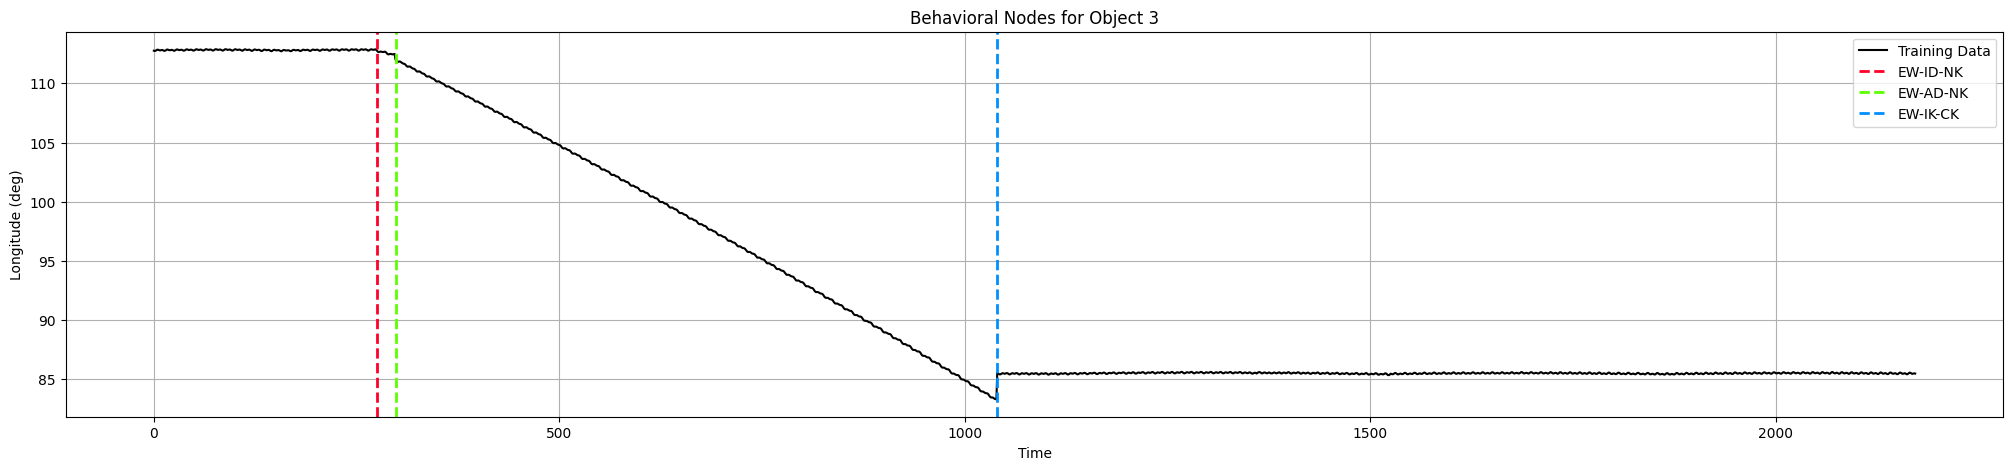

In [5]:
fig = plt.figure(figsize=(25, 5))
cm = plt.get_cmap('gist_rainbow')
plt.plot(data.index, data['Longitude (deg)'], color = 'k', label='Training Data')
for ik in range(len(node_label)-3):
    if node_label["Direction"][ik+2] == 'EW':
        plt.axvline(x = node_label['TimeIndex'][ik+2], color = cm(ik/(len(node_label)-3)), linestyle = '--', linewidth=2, label='EW-'+str(node_label["Node"][ik+2])+'-'+str(node_label["Type"][ik+2]))
    else:
        plt.axvline(x = node_label['TimeIndex'][ik+2], color = cm(ik/(len(node_label)-3)), linestyle = '--', linewidth=2, label='EW-'+str(node_label["Node"][ik+2])+'-'+str(node_label["Type"][ik+2]))
plt.title('Behavioral Nodes for Object ' + str(idx_data))
plt.xlabel('Time')
plt.ylabel('Longitude (deg)')
plt.legend()
plt.grid()
plt.show()

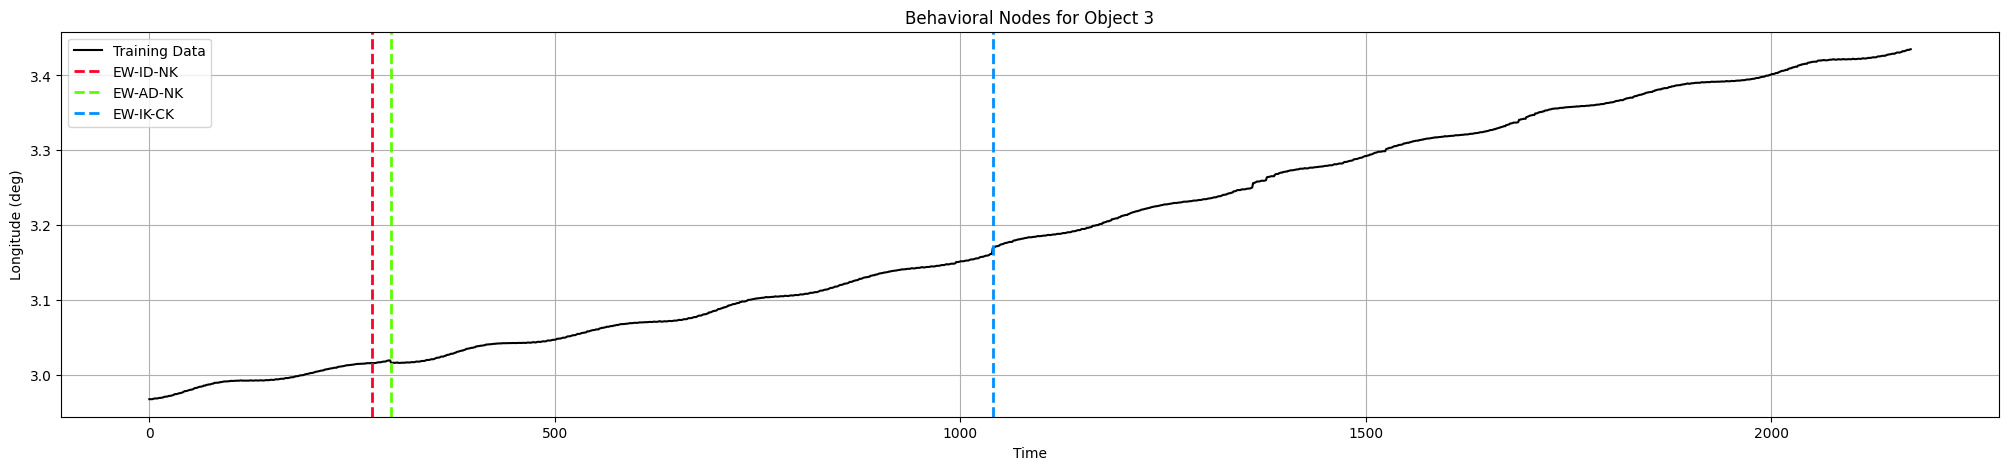

In [6]:
fig = plt.figure(figsize=(25, 5))
cm = plt.get_cmap('gist_rainbow')
plt.plot(data.index, data['Inclination (deg)'], color = 'k', label='Training Data')
for ik in range(len(node_label)-3):
    if node_label["Direction"][ik+2] == 'EW':
        plt.axvline(x = node_label['TimeIndex'][ik+2], color = cm(ik/(len(node_label)-3)), linestyle = '--', linewidth=2, label='EW-'+str(node_label["Node"][ik+2])+'-'+str(node_label["Type"][ik+2]))
    else:
        plt.axvline(x = node_label['TimeIndex'][ik+2], color = cm(ik/(len(node_label)-3)), linestyle = '--', linewidth=2, label='EW-'+str(node_label["Node"][ik+2])+'-'+str(node_label["Type"][ik+2]))
plt.title('Behavioral Nodes for Object ' + str(idx_data))
plt.xlabel('Time')
plt.ylabel('Longitude (deg)')
plt.legend()
plt.grid()
plt.show()